### An automated code consisting of three modules (or cells) to be constructed. The cumulonimbus cloud (see Q1cloud.jpeg) forms due to rising thermal plumes from hot spots on earth when they condenses in the sky above 2 km from the sea level. The provided picture is in total of 10 km in width and 4 km in height. Compute (a) singular values as a function of first r singular values, (b) reconstruct images using SVD technique for 70% and 90% of cumulative sum of singular values, (c) find two-dimensional projected area of the white vapor content in square kilometers.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Midsem_2023/')


from matplotlib.image import imread
A = imread(os.path.join('Q1cloud.jpeg'))
Abw = np.mean(A, -1); # Convert RGB to grayscale

a) Singular values as a function of r

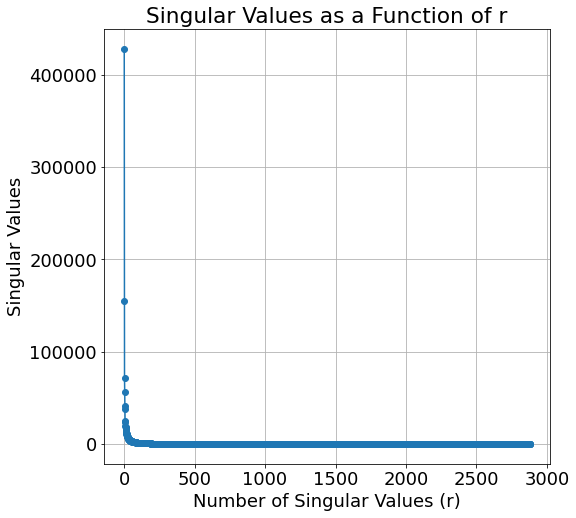

In [4]:


# Perform SVD
U, S, VT = np.linalg.svd(Abw, full_matrices=False)

# Define a range of r values can set r_values = np.arange(1,r+1) r being the no.of values we need.
r_values = np.arange(1, len(S) + 1)

# Plot singular values as a function of the first r singular values
plt.plot(r_values, S[:len(r_values)], marker='o', linestyle='-')
plt.xlabel('Number of Singular Values (r)')
plt.ylabel('Singular Values')
plt.title('Singular Values as a Function of r')
plt.grid(True)
plt.show()


b) reconstructing for 70 and 90 percent

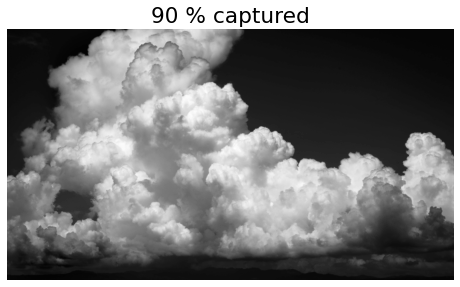

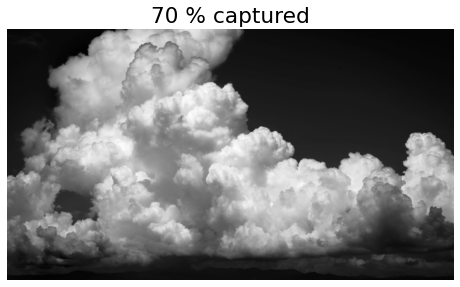

In [5]:
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X90)
plt.set_cmap('gray')
plt.title('90 % captured')
plt.axis('off')
plt.show()

cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r70 = np.min(np.where(cdS > 0.70)) # Find r to capture 70% energy

X70 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X70)
plt.set_cmap('gray')
plt.title('70 % captured')
plt.axis('off')
plt.show()


c) area calculation

In [8]:
ans=0;
for i in range(X70.shape[0]):
    for j in range(X70.shape[1]):
        if X70[i,j]>=100: #considering 100 is the intensity where the black spots are there
            ans = ans+1
total = X70.shape[0]*X70.shape[1]
ans = ans/total*(40) #40 for km^2
print(ans) #in sq.kms

19.665630425347224
